**Invariance in time-frequency representations**

Instructor: Vincent Lostanlen, LS2N, CNRS

The goal of this assignment is to disentangle the factors of variability in natural audio signals, such as musical notes. For this purpose, we will use a Python library named librosa.

To learn more about librosa, visit: https://librosa.org/

**Auteurs** : Saâd **AZIZ ALAOUI** , Samy **HAFFOUDHI**, Yassine **JAMOUD**

In [ ]:
!pip install pandas

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import Audio, display
import librosa
import librosa.display
import matplotlib
import numpy as np
import pandas as pd
import scipy
import tqdm

for module in [librosa, matplotlib, np, pd, scipy, tqdm]:
    print("{} version: {}".format(module.__name__, module.__version__))

librosa version: 0.9.0
matplotlib version: 3.4.2
numpy version: 1.21.2
pandas version: 1.3.3
scipy version: 1.7.1
tqdm version: 4.62.2


**Part I: Invariance to time shifts**

As a first step, let us look at the autocorrelation function of an exponential decay signal.

This signal will later serve as an idealized model for the amplitude envelope of a musical note.


*Exercise*

Design as real-valued signal x such that x(0)=1 and such that the amplitude of x decreases by a factor 2 after every decay_time.

In [2]:
def exponential_decay( sr=22050.0, duration=1.0, decay_time=0.05):
    """Return a real-valued signal x such that x(0)=1 and
    such that the amplitude of x decreases by a factor 2
    after every decay_time.
    """
    # TODO
    t = np.arange(0, duration,1/sr)
    x = (1/2) ** (t/decay_time)
    
    # Consider using: np.arange, np.exp
    return x

Text(0.5, 1.0, 'Exponential decay')

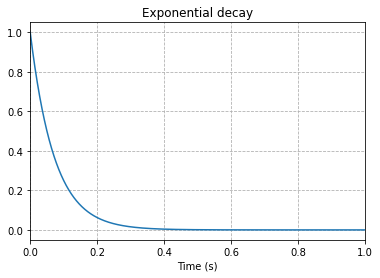

In [4]:
sr = 22050
duration = 1.0
decay_time = 0.05

t = np.arange(0, duration, 1/sr)
x = exponential_decay(sr, duration, decay_time)

plt.plot(t, x)
plt.grid(linestyle="--")
plt.xlabel("Time (s)")
plt.xlim(0, duration)
plt.title("Exponential decay")

*Questions*
1. What is the value of `x[int(sr*decay_time)]` ?
2. What is the value of `x[int(n*sr*decay_time)]` for any integer `n` ?

**1)** La valeur de `x[int(sr*decay_time)]` est naturellement 1/2 puisque x(0) = 1 . C'est le premier pas après x(0), or on divise par 2 à chaque pas .

**2)** `x[int(n*sr*decay_time)]` = 1/(2^n)

*Exercise*

Compute the normalized autocorrelation of the signal x.

In [5]:
def normalized_autocorrelation(x):
    """Return the normalized autocorrelation of a
    one-dimensional real-valued signal x of length N.
    
    For tau between (-N+1) and N,
    
    xcorr(tau) = sum_{t=0}^{N-1} xnorm_{t} xnorm_{t-tau}
    
    where xnorm is the L2-normalized version of x:
    
    xnorm(t) = x(t) / ||x||_2
    
    Parameters
    ----------
    sr: sample rate in Hertz
    duration: duration in seconds
    decay_time: decay time in seconds
    """
    # TODO
    xnorm = x/  scipy.linalg.norm(x)
    xcorr = scipy.signal.correlate(xnorm,xnorm)
    # Consider using: scipy.signal.correlate, scipy.linalg.norm
    return xcorr

Text(0.5, 1.0, 'Normalized autocorrelation')

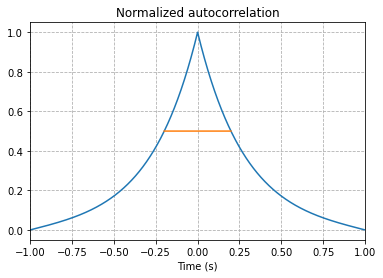

In [6]:
x = exponential_decay(sr, duration, 0.2)
xcorr = normalized_autocorrelation(x)
lags = scipy.signal.correlation_lags(x.size, x.size)
cutoff_lag = np.min(np.abs(lags[xcorr<0.5]))
condition = np.abs(lags)<cutoff_lag

plt.plot(lags/sr, xcorr)
plt.plot(
    lags[np.abs(lags)<cutoff_lag]/sr,
    0.5 * np.ones_like(lags[np.abs(lags)<cutoff_lag]))
plt.xlim(-duration, duration)
plt.grid(linestyle="--")
plt.xlabel("Time (s)")
plt.title("Normalized autocorrelation")


Plot the normalized autocorrelation of the exponential decay signal which you designed earlier.

*Questions*

3. What is the value of normalized autocorrelation at lag = zero ?

4. What is the minimum lag such that the normalized autocorrelation is below 0.5?

5. Same question after varying the decay time to 100 milliseconds, 200 milliseconds.

**3)** La valeur à lag = zero est 1 car l'échelle des temps est lags/sr et aussi parceque la fonction est naturellement correlée avec elle-même à lag=0 .


**4)** On calcule sur la cell d'avant que le lag_min est -0.09986

In [7]:
result = np.where((xcorr < 0.5005) & (xcorr > 0.4999995) )
lags[result[0]]/sr

array([-0.19913832, -0.19909297, -0.19904762, -0.19900227, -0.19895692,
       -0.19891156,  0.19891156,  0.19895692,  0.19900227,  0.19904762,
        0.19909297,  0.19913832])

**5)** Quand on augmente le decay_time à 0.2, on obtient lag_min = -0.1989. Le fait que lag min augmente ( en valeur absolue ) est un résultat attendu car plus le decay_time augmente, plus les lags sont grands sur l'autocorrélation. 

*Exercise*

Define a piecewise constant signal, equal to 1 over [0, decay_time] and zero elsewhere.
Replace the exponential decay signal by a rectangular signal of width lag_time.


In [8]:
def rectangular(sr, duration, decay_time):
    """Return a real-valued signal x such that
    x(t) = 1 if t is between 0 and decay_time
    x(t) = 0 if t is larger than decay_time
    
    Parameters
    ----------
    sr: sample rate in Hertz
    duration: duration in seconds
    decay_time: decay time in seconds
    """
    # TODO
    # Consider using: np.arange, np.zeros, range indexing
    x = np.zeros(round(duration*sr))
    ind = round(decay_time * sr)
    x[:ind] = 1
    return x

Text(0.5, 1.0, 'Rectangular signal')

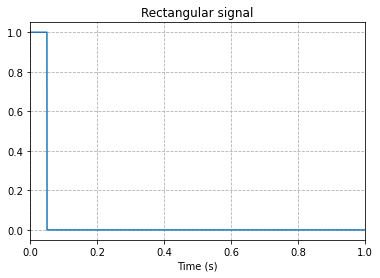

In [9]:
sr = 22050
duration = 1.0
decay_time = 0.05

t = np.arange(0, duration, 1/sr)
x = rectangular(sr, duration, decay_time)

plt.plot(t, x)
plt.grid(linestyle="--")
plt.xlabel("Time (s)")
plt.xlim(0, duration)
plt.title("Rectangular signal")

Text(0.5, 1.0, 'Normalized autocorrelation')

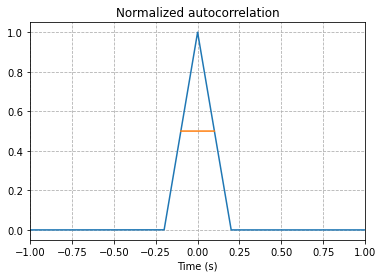

In [10]:
x = rectangular(sr, duration, 0.2)
xcorr = normalized_autocorrelation(x)
lags = scipy.signal.correlation_lags(x.size, x.size)
cutoff_lag = np.min(np.abs(lags[xcorr<0.5]))
condition = np.abs(lags)<cutoff_lag

plt.plot(lags/sr, xcorr)
plt.plot(
    lags[np.abs(lags)<cutoff_lag]/sr,
    0.5 * np.ones_like(lags[np.abs(lags)<cutoff_lag]))
plt.xlim(-duration, duration)
plt.grid(linestyle="--")
plt.xlabel("Time (s)")
plt.title("Normalized autocorrelation")


*Questions*

6. What is the shape of the normalized autocorrelation signal?
7. For what range of lags does the normalized autocorrelation exceed 0.5?

**6)** Le signal d'autocorrélation normalisé ressemble à un triangle, nul avant le début et après la fin.

**7)** Nous répondons à la question 7 par ce code : 

In [11]:
result1 = np.where((xcorr > 0.5))
lags[result1[0]]/sr

array([-0.09995465, -0.0999093 , -0.09986395, ...,  0.0999093 ,
        0.09995465,  0.1       ])

*Exercise*

Design a musical note as an exponentially decaying sine wave.

In [12]:
def exp_decaying_sine(sr, duration, decay_time, carrier_frequency):
    """Return an exponentially decaying sine wave.
    
    Parameters
    ----------
    sr: sample rate in Hertz
    duration: duration in seconds
    decay_time: decay time in seconds
    carrier_frequency: carrier frequency in seconds
    """
    # TODO
    # Consider using: np.arange, np.sin, exponential_decay
    t = np.arange(0, duration , 1/sr)
    x = exponential_decay(sr, duration, decay_time) * np.sin(2*np.pi * carrier_frequency * t)
    return x

Text(0.5, 1.0, 'Exponentially modulated sine wave')

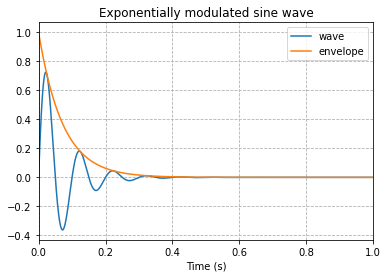

In [13]:
sr = 22050
duration = 1.0
decay_time = 0.05
carrier_frequency = 10

t = np.arange(0, duration, 1/sr)
x = exp_decaying_sine(sr, duration, decay_time, carrier_frequency)
x_envelope = exponential_decay(sr, duration, decay_time)

plt.plot(t, x, label="wave")
plt.plot(t, x_envelope, label="envelope")
plt.grid(linestyle="--")
plt.xlabel("Time (s)")
plt.xlim(0, duration)
plt.legend()
plt.title("Exponentially modulated sine wave")

*Questions*

8. What is the value of x for t=0 ?

9. What is the average value of x? of x_envelope?

**8)** Pour t=0 , x = 0 . 

In [14]:
x[0]

0.0

**9)** La valeur moyenne de x est de 0.015 et celle de x_envelope est de 0.144 . Il nous semble normal que celle de x soit inférieure à celle de x_envelope puisque x < x_envelope pour tout t 

In [15]:
print(np.mean(x) , np.mean(x_envelope))

0.01517666667120938 0.07215736134277964


Let us now compare the autocorrelations of x and x_envelope.

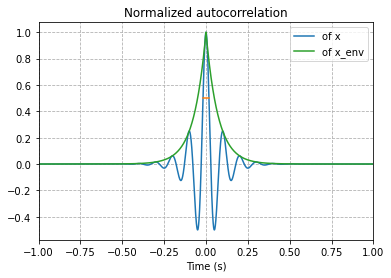

In [16]:
xcorr = normalized_autocorrelation(x)
lags = scipy.signal.correlation_lags(x.size, x.size)
cutoff_lag = np.min(np.abs(lags[xcorr<0.5]))
condition = np.abs(lags)<cutoff_lag

plt.plot(lags/sr, xcorr, label="of x")
plt.plot(
    lags[np.abs(lags)<cutoff_lag]/sr,
    0.5 * np.ones_like(lags[np.abs(lags)<cutoff_lag]))
plt.xlim(-duration, duration)
plt.grid(linestyle="--")
plt.xlabel("Time (s)")
plt.title("Normalized autocorrelation")

x_env_corr = normalized_autocorrelation(x_envelope)
plt.plot(lags/sr, x_env_corr, label="of x_env")
plt.legend()

*Questions*

10. Which signal has the greater invariance, x or x_env ?
11. For x, what is the minimum lag such that the normalized autocorrelation is below 0.5?
12. Vary decay_time and carrier_frequency. How does it affect this minimum lag?

**10)** Ici, on parle de notion d'invariance par translation qui est naturellement abordée dans les questions de signal. Le décalage par " lag " est une translation et on a besoin d'avoir une bonne invariance par rapport à cela. On voit bien sur la figure que l'enveloppe de x est plus stable par translation que x car elle varie lentement selon les lags. C'est pour cela qu'on calcule et s'intéresse souvent à l'enveloppe qui est une forme de porteuse.


**11)** On calcule sur la cell d'après que lag_min vaut -0.0176

In [17]:
result2 = np.where((xcorr < 0.51) & (xcorr > 0.4999))
lags[result2[0]]/sr

array([-0.01768707, -0.01764172, -0.01759637, -0.01755102,  0.01755102,
        0.01759637,  0.01764172,  0.01768707])

**12)** Quand le carrier_frequency grandit " 100 par exemple " , lag_min = -0.1
Quand il baisse, " 5 " , lag_min = -0.035
On conclut que selon le carrier_frequency, lag_min augmente en valeur absolue selon les 2 sens de variation.

Pour le decay_time, quand il vaut 0.5, lag_min = -0.016.
Quand il vaut 0.05, lag_min = -0.017.
Ce dernier n'a donc pas énormément d'influence pour des variations " normales " sur le lag_min.

Il semble naturel que le carrier_frequency influe plus sur le résultat car c'est lui qui crée les variations très rapides ou très lentes.

**Part II. Pattern matching in the time-frequency domain**

Consider the following sequence of musical tones with varying durations and carrier frequencies.
It forms an ascending arpeggio (in G major).

Our goal is to characterize this arpeggio while satisfying invariance to small time shifts.

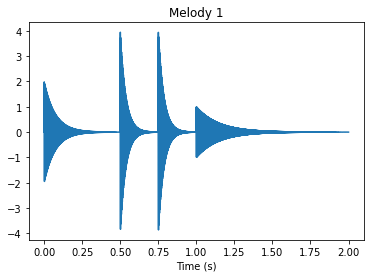

In [18]:
note_frequencies = [400, 500, 600, 800] # in Hertz
note_values = [1/2, 1/4, 1/4, 1] # in musical beats
pulse = 120 # in beats per minute
sr = 16000 # in Hertz

melody1 = np.concatenate([1/value * exp_decaying_sine(
    sr=sr, duration=value*120/pulse, decay_time=0.1*value, carrier_frequency=freq)
    for (value, freq) in zip(note_values, note_frequencies)])

t = np.arange(len(melody1))/sr
plt.plot(t, melody1)
plt.xlabel("Time (s)")
plt.title("Melody 1")
Audio(melody1, rate=sr)

*Exercise*

Design another signal, `melody2`, in which the note values are the same as `melody1` but the order of note frequencies is reversed: 800, 600, 500, 400.

Consider using the `reversed` function to reverse a list.

In [19]:
melody2 = np.concatenate([1/value * exp_decaying_sine(
    sr=sr, duration=value*120/pulse, decay_time=0.1*value, carrier_frequency=freq)
    for (value, freq) in zip(note_values, reversed(note_frequencies))])

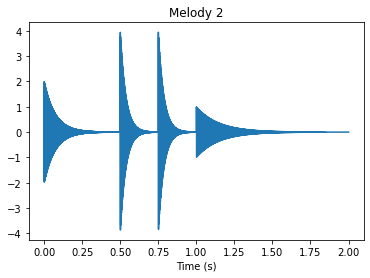

In [20]:
t = np.arange(len(melody2))/sr
plt.plot(t, melody2)
plt.xlabel("Time (s)")
plt.title("Melody 2")
Audio(melody2, rate=sr)

*Questions*
1. Do `melody1` and `melody2` look similar on the waveform display? Why?
2. Do they sound similar? Why?


**1)** Oui ils semblent être identiques sur le plan temporel. Notons tout d'abord le fait que si on les superposait et qu'on zommait à l'échelle de la variation de la porteuse, on remarquerait quelques différences.
Ensuite, les deux signaux semblent être identiques car on ne change ni amplitude ni durée des sons, seulement leur hauteur qui n'est pas visible sur ce plan.

**2)** Non, ils ne sonnent pas pareil car l'ordre des notes changent. On comprend directement que le son est simplement inversé comme si on chantait " Do ré mi fa so la si do" puis l'inverse.

Finally, let us design a third melody which is the same as `melody2` but shifted in time by 25 milliseconds.

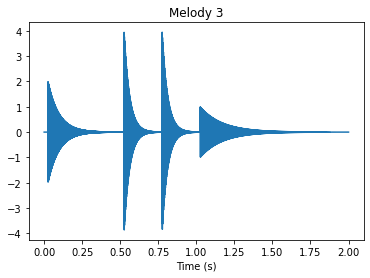

In [21]:
melody3 = np.pad(melody2, (sr//40,0))[:(-sr//40)]

t = np.arange(len(melody3))/sr
plt.plot(t, melody3)
plt.xlabel("Time (s)")
plt.title("Melody 3")
Audio(melody3, rate=sr)

*Exercise*

Write a function to evaluate the cosine distance between two vectors x and y of identical size.

In [22]:
def cosine_distance(x, y):
    """
    Returns the cosine distance between two
    vectors x and y of identical size:
    
    dist = 1 - <x|y> / (||x||_2 ||y||_2)
    """
    # Consider using np.dot, np.linalg.norm
    dist = 1 - np.dot(x,y) /(np.linalg.norm(x) * np.linalg.norm(y))
    return dist

*Question*

3. Without doing any computation, fill in the table below. Try imagining if the cosine distance between `melody1` and `melody2` will be qualitatively "small" or "large" depending on the representation domain. Same with the distance bwetween `melody2` and `melody3`.

Reminder: `melody2` is in sync with `melody1` but has different carrier frequencies. `melody3` has the same carrier frequencies as `melody2` but it delayed by 25 milliseconds.

```
| Representation                          | dist(melody1, melody2) | dist(melody2, melody3) |
|-----------------------------------------|------------------------|------------------------|
| waveform                                | large                  | large                  |
| temporal envelope                       | small                  | small " just a shift " |
| Fourier spectrum                        | 0                      | 0                      |
| STFT spectrogram (window size = 100 ms) | large                  | large                  |
```

Numerical application below.

In [23]:
def envelope(x):
    return np.abs(x + 1j * scipy.signal.hilbert(x))

def spectrum(x):
    return np.abs(np.fft.rfft(x))

def spectrogram(x, sr, window=0.1):
    return np.abs(librosa.stft(x, win_length=int(window*sr)))

df = pd.DataFrame()
df["Representation"] = ["waveform", "temporal envelope",
    "Fourier spectrum", "STFT spectrogram (T=100 ms)"]

for (x, y, column) in [[melody1, melody2, "1<->2"], [melody2, melody3, "2<->3"]]:
    wav_dist = cosine_distance(x, y)
    env_dist = cosine_distance(envelope(x), envelope(y))
    spectrum_dist = cosine_distance(spectrum(x), spectrum(y))
    spectrogram_dist = cosine_distance(spectrogram(x, sr).ravel(), spectrogram(y, sr).ravel())
    df[column] = [wav_dist, env_dist, spectrum_dist, spectrogram_dist]

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df

,Representation,1<->2,2<->3
0,waveform,0.994,0.795
1,temporal envelope,0.079,0.421
2,Fourier spectrum,0.027,0.000
3,STFT spectrogram (T=100 ms),0.844,0.182


Does the table above match your expectations?

**Pour la partie waveform**, nos attentes sont respectées puisque les deux distances sont grandes, pareil pour le fourier spectrum.
Pour l'enveloppe temporelle, 1<->2 est bien small mais on estimait une valeur plus faible pour 2<->3 . En effet, avec seulement ce petit shift, on estimait une grande similarité en temporal envelope.
Pour la STFT, 1<->2 est bien grande mais on estimait une valeur large voire medium pour 2<->3 , pas small. On en conclut que la valeur de la cosine distance pour le shift temporel dépend grandement de la taille de la fenêtre.


*Question*

4. In what sense does the STFT constitute a tradeoff for pattern matching? What are its strengths and limitations?

**4)** La STFT présente ici le compromis temps-fréquence. On a deux transformations ici, une en fréquence "2" et une en temps "3". Le seul paramètre modifiable pour la STFT et la taille de la fenêtre T, donc, intéressons nous à ceci. Plus T est grand, plus la précision temporelle est bonne et la fréquentielle mauvaise. On en déduit que pour une translation temporelle, la distance cosine sera quand même faible, alors qu'elle sera élevée pour une modification fréquentielle. 
Le même raisonnement nous pousse à dire que pour un T faible, la précision temporelle baisse et la fréquentielle augmente. Donc la distance cosine sera faible pour une modification fréquentielle mais énorme pour une translation temporelle.

**Part III. Invariance to frequency transposition**

In this part, we will design a signal representation that is invariant to the choice of carrier frequency while being sensitive to the shape of the waveform: for example, triangular versus square.

In [25]:
def sawtooth_wave(sr, duration, carrier_frequency):
    """Return a sawtooth wave.
    
    Parameters
    ----------
    sr: sample rate in Hertz
    duration: duration in seconds
    carrier_frequency: carrier frequency in seconds
    """
    # Consider using: np.arange, signal.sawtooth
    t = np.arange(0, duration, 1 / sr)
    x = scipy.signal.sawtooth(2 * np.pi * carrier_frequency * t, width=0.5)
    return x

def square_wave(sr, duration, carrier_frequency):
    """Return a square wave.
    
    Parameters
    ----------
    sr: sample rate in Hertz
    duration: duration in seconds
    carrier_frequency: carrier frequency in seconds
    """
    # Consider using: np.arange, signal.square
    t = np.arange(0, duration, 1 / sr)
    x = scipy.signal.square(2 * np.pi * carrier_frequency * t)
    return x

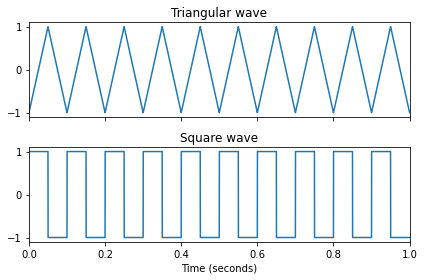

In [26]:
sr = 22050
duration = 1.0
decay_time = 0.1
carrier_frequency = 10

t = np.arange(0, duration, 1/sr)
x_saw = sawtooth_wave(sr, duration, carrier_frequency)
x_squ = square_wave(sr, duration, carrier_frequency)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, x_saw)
ax[0].set_title("Triangular wave")
ax[1].plot(t, x_squ)
ax[1].set_title("Square wave")
plt.xlim(0, duration)
plt.xlabel("Time (seconds)")
plt.tight_layout()

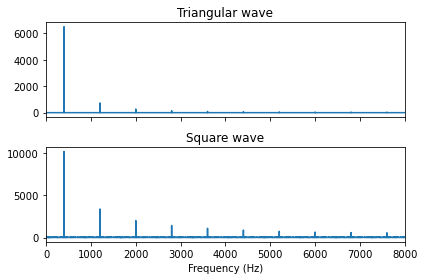

In [27]:
sr = 16000
duration = 1.0
carrier_frequency = 400

omega = np.arange(0, sr/2, 1/duration)

x_tri = sawtooth_wave(sr, duration, carrier_frequency)
xhat_tri = np.abs(np.fft.rfft(x_tri)[:-1])
x_squ = square_wave(sr, duration, carrier_frequency)
xhat_squ = np.abs(np.fft.rfft(x_squ)[:-1])

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(omega, xhat_tri)
ax[0].set_title("Triangular wave")
ax[1].plot(omega, xhat_squ)
ax[1].set_title("Square wave")
plt.xlim(0, sr/2)
plt.xlabel("Frequency (Hz)")
plt.tight_layout()

*Questions*
1. Compare the two waves in the time domain. What do they have in common?
2. Which one is more regular? (in the sense of Hölder)
3. Which one has faster decay in the Fourier domain?

**1)** Dans le domaine temporel, les signaux sont différents. Cependant, on voit qu'ils ont la même fréquence fondamentale.

**2)** Au sens de Hölder, c'est le triangle qui est le plus régulier car il est borné lui et sa dérivée. Ce n'est pas le cas du signal carré dont la dérivée n'est pas bornée.

**3)** On remarque que le signal triangulaire converge plus rapidement vers des fréquences nulles. Le signal carré a donc un meilleur délai

Let us now synthesize three waves:
* x1_squ, a square wave with fundamental frequency f1 = 400 Hz
* x2_squ, a square wave with fundamental frequency f2 = 440 Hz
* x2_tri, a triangle wave with fundamental frequency f2

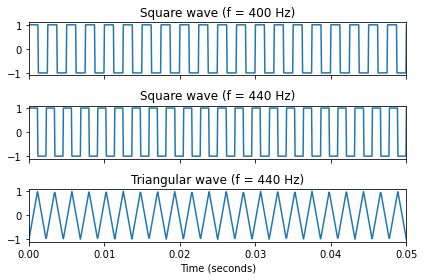

In [28]:
sr = 16000
duration = 1.0
f1 = 400
f2 = 440

t = np.arange(0, duration, 1/sr)
x1_squ = square_wave(sr, duration, f1)
x2_squ = square_wave(sr, duration, f2)
x2_tri = sawtooth_wave(sr, duration, f2)

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(t, x1_squ)
ax[0].set_title("Square wave (f = {} Hz)".format(f1))
ax[1].plot(t, x2_squ)
ax[1].set_title("Square wave (f = {} Hz)".format(f2))
ax[2].plot(t, x2_tri)
ax[2].set_title("Triangular wave (f = {} Hz)".format(f2))
plt.xlim(0, 20 / min(f1, f2))
plt.xlabel("Time (seconds)")
plt.tight_layout()

*Question*

4. Without doing any computation, fill in the table below. Try imagining if the cosine distance between `x1_tri` and `x2_tri` will be qualitatively "small" or "large" depending on the representation domain. Same with the distance bwetween `x2_tri` and `x2_squ`.

Reminder: `x2_tri` has the wave shape as `x1_tri` but a different fundamental frequency. `x2_squ` has the same fundamental frequency as `x2_tri` but a different wave shape.


!!! Ici les sq sont des tris et les tri des sq, erreur de nom il me semble !!!

```
| Representation                          | dist(x1_tri, x2_tri)   | dist(x2_tri, x2_squ)   |
|-----------------------------------------|------------------------|------------------------|
| waveform                                | large                  | large                  |
| Fourier spectrum                        | large                  | small                  |
| STFT spectrogram (window size = 100 ms) | large                  | small                  |
```

In [29]:
df = pd.DataFrame()
df["Representation"] = ["waveform", "Fourier spectrum", "STFT spectrogram (T=100 ms)"]

for (x, y, column) in [[x1_squ, x2_squ, "x1_squ<->x2_squ"], [x2_squ, x2_tri, "x2_squ<->x2_tri"]]:
    wav_dist = cosine_distance(x, y)
    spectrum_dist = cosine_distance(spectrum(x), spectrum(y))
    spectrogram_dist = cosine_distance(spectrogram(x, sr).ravel(), spectrogram(y, sr).ravel())
    df[column] = [wav_dist, spectrum_dist, spectrogram_dist]
    
df

,Representation,x1_squ<->x2_squ,x2_squ<->x2_tri
0,waveform,1.000,1.008
1,Fourier spectrum,0.995,0.060
2,STFT spectrogram (T=100 ms),0.953,0.060


Does the table above match your expectations?

Oui, les valeurs numériques concordent bien avec nos attentes

*Question*

5. Is the STFT spectrogram invariant to time shifts? If so, up to what amount?
6. Is the STFT spectrogram invariant to musical pitch shifts? If so, up to what amount?

**5)** Le spectrogramme de la STFT est bien invariant aux décalages temporels, mais on remarque que ceci est vrai jusqu'à la distance nulle représentée par la moitié de la taille d'entre deux.

**6)** Le spectrogramme de la STFT n'est pas invariant aux changements fréquentiels.

**IV. Octave scalogram of its average**

To improve invariance to frequency transposition, we will map STFT frequencies to octave-wide bands.

*Question*

1. Consider the function below. What does it do? What are its arguments and return value?


Text(0.5, 1.0, 'Octave filterbank')

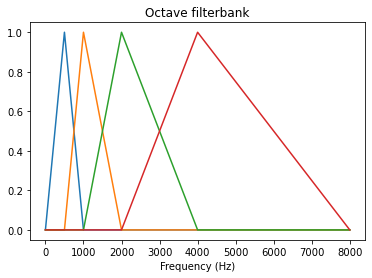

In [30]:
def octave_filterbank(fmin, sr, n_fft):
    n_octaves = int(np.log2(sr/fmin) - 2)
    freqs = [fmin * (2**n) for n in range(2+n_octaves)]
    passbands = np.zeros((len(freqs)-2, int(1 + n_fft // 2)))
    fftfreqs = librosa.filters.fft_frequencies(sr=sr, n_fft=n_fft)
    fdiff = np.diff(freqs)
    ramps = np.subtract.outer(freqs, fftfreqs)
    
    for i in range(len(freqs)-2):
        # lower and upper slopes for all bins
        lower = -ramps[i, :] / fdiff[i]
        upper = ramps[i + 2, :] / fdiff[i + 1]

        # .. then intersect them with each other and zero
        passbands[i, :] = np.maximum(0, np.minimum(lower, upper))
        
    return passbands

n_fft = 32
fftfreqs = librosa.filters.fft_frequencies(sr=sr, n_fft=n_fft)
fbank = octave_filterbank(fmin=250, sr=sr, n_fft=n_fft)
plt.plot(fftfreqs, fbank.T)
plt.xlabel("Frequency (Hz)")
plt.title("Octave filterbank")

**1)**  Cette fonction retourne 4 passe-bandes laissant chacun passer une octava.

La fonction prend en argument :

* `fmin`: la fréquence à partir de laquelle on considère les octaves
* `sr`: la fréquence d'échantillonage
* `n_fft`: la taille de la fenêtre pour le calcul de la fft 

Elle retourne la réponse fréquentielle des 4 filtres.

*Exercise*

Write a function `scalogram` which computes the STFT of a signal `x` over a very short window (2 milliseconds by default) and maps its frequencies to octave-wide bands starting at `fmin`.

In [31]:
def scalogram(x, fmin, sr, window=0.002):
    """Compute the octave scalogram of a time-domain signal x,
    defined as:
    
    sc(k, t) = \sum_{omega} passbands(k, omega) |X|(omega, t)
    
    where
    * X is the short-term Fourier transform of the input
    * |.| denotes complex modulus
    * k is the octave index
    * passbands(k, omega) is the passband of the k'th filter at frequency omega
    
    Parameters
    ----------
    x: input signal
    fmin: minimum frequency of the octave filterbank in Hertz
    sr: sample rate in Hetz
    window: window length in seconds
    """
    n_fft = int(window*sr)
    passbands = octave_filterbank(fmin, sr=sr, n_fft=n_fft)
    # Consider using: librosa.stft, np.abs, np.dot
    X = librosa.stft(x, n_fft = n_fft)
    sc = np.dot(passbands,np.abs(X))
    return sc

Now let's compute the scalograms of a sine wave, a triangle wave, and a square wave.

(4, 201)
(4, 201)
(4, 201)


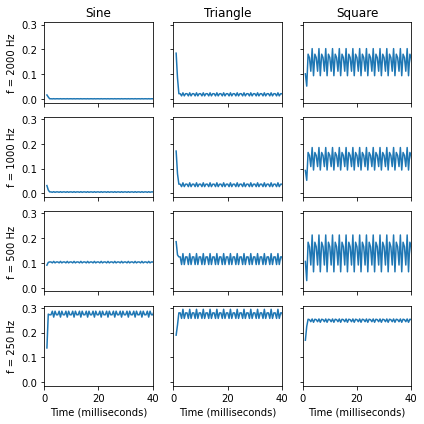

In [32]:
fmin = 250
sr = 16000
duration = 0.1
f0 = 400
window = 0.002

t = np.arange(0, duration, 1/sr)
x_sin = np.sin(2*np.pi*f0*t)
x_tri = sawtooth_wave(sr=sr, duration=duration, carrier_frequency=f0)
x_squ = square_wave(sr=sr, duration=duration, carrier_frequency=f0)

fig, ax = plt.subplots(figsize=(6, 6),
    nrows=int(np.log2(sr/fmin)-2), ncols=3,
    sharex=True, sharey=True)
titles = ["Sine", "Triangle", "Square"]
for i, x in enumerate([x_sin, x_tri, x_squ]):
    ax[0, i].set_title(titles[i])
    sc = scalogram(x / np.linalg.norm(x), fmin, sr)
    print(sc.shape)
    n_fft = int(window*sr)
    hop_length = n_fft//4
    t_sc = librosa.times_like(sc, sr=sr, hop_length=hop_length, n_fft=n_fft)
    for j in range(sc.shape[0]):
        if i==0:
            ax[-1-j, i].set_ylabel("f = {} Hz".format(fmin * (2**j)))
        ax[-1-j, i].plot(1000*t_sc, sc[j, :])
    ax[j, i].set_xlabel("Time (milliseconds)")
    
plt.xlim(0, 40)
plt.tight_layout()

*Questions*

2. Comment the chart above. Which wave shape has more energy in the upper-frequency range? Why?
3. For which frequencies and wave shapes do you notice large amplitude modulations? Why?
4. What is the rate of amplitude modulations in the scalogram?

**2)** On remarque que les signaux carrés ont plus d'energie dans les hautes fréquences. La raison est que leurs séries de fourier ont pusieurs composantes HF.

**3)** On observe directement que pour toutes les bandes de  fréquences des signaux triangulaires et carrés, beaucoup de modulation d'amplitude est présente. Notons que ce phénomène est surtout présent en BF pour les signaux triangulaires.

**4)** Le taux de modulation d'amplitude est à peu près le même pour tous.

*Exercise*

Average the scalogram over the time dimension.

In [33]:
def averaged_scalogram(y, sr):
    """Compute the time-averaged octave scalogram of a
    time-domain signal y, defined as:
    
    avg_sc(k) = \sum_{t} \sum_{omega} passbands(k, omega) |X|(omega, t)
    
    where
    * Y is the short-term Fourier transform of the input
    * |.| denotes complex modulus
    * k is the octave index
    * passbands(k, omega) is the passband of the k'th filter at frequency omega
    
    The minimum frequency is set to 250 Hz and the window size to 2 milliseconds.
    
    Parameters
    ----------
    y: input signal
    sr: sample rate in Hetz
    """
    fmin = 250
    window = 0.002
    sc = scalogram(y, fmin, sr, window=0.002)
    # Consider using np.sum
    return np.sum(sc, axis=1)

In [34]:
df = pd.DataFrame()
df["Representation"] = [
    "waveform", "Fourier spectrum", "STFT spectrogram (T=100 ms)",
    "Averaged scalogram",
]

for (x, y, column) in [[x1_squ, x2_squ, "x1_squ<->x2_squ"], [x2_squ, x2_tri, "x2_squ<->x2_tri"]]:
    wav_dist = cosine_distance(x, y)
    spectrum_dist = cosine_distance(spectrum(x), spectrum(y))
    spectrogram_dist = cosine_distance(spectrogram(x, sr).ravel(), spectrogram(y, sr).ravel())
    avg_scal_dist = cosine_distance(
        averaged_scalogram(x, sr), averaged_scalogram(y, sr))
    
    df[column] = [wav_dist, spectrum_dist, spectrogram_dist, avg_scal_dist]

df

,Representation,x1_squ<->x2_squ,x2_squ<->x2_tri
0,waveform,1.000,1.008
1,Fourier spectrum,0.995,0.060
2,STFT spectrogram (T=100 ms),0.953,0.060
3,Averaged scalogram,0.000,0.134


*Questions*

6. Is the averaged scalogram invariant to musical pitch shifts? If so, up to what amount?
7. Do you have an idea on how you could boost the second distance (x1_squ <-> x2_squ) while keeping the first distance (x2_squ <-> x2_tri) at a low value?

**6)**  On remarque que le scalogramme moyenné est invariant à la différence de hauteur puisque la distance entre les 2 signaux carrés ayant des fréquences fondamentales différentes est nulle.

**7)** On peut imaginer cela : Si on prend les composantes hautes fréquences et qu'on applique ces transformations à un signal carré et puis qu'on compare le nouveau signal au carré initial, on minimise la première distance et maximise la distance au signal triangle. Pour la première étape, on peut également appliquer une pondération de signaux filtrés pour accorder plus d'importance aux hautes fréquences.